# TO DO

- assign topics to documents
- look at sentiment across different topics
    - dataframe: topic, document, sentiment (3 columns)
    - e.g. might see, 3rd trimester --> negative sentiment, but 6 wks --> positive sentiment

Tony's idea:
- create plot of three different topics and map the sentiments onto them
    - positive: > 0.5
    - neutral: -0.5 - 0.5
    - negative: < 0.5

If time for predictive model:
- can I predict what side of the debate the person is on based on sentiment?


Other:
- use packages that analyze the writing level - is there a difference in level of intelligence of dif people on dif subreddits?
- might have dif viewpoints in each subreddit - try to do some tagging of dif viewpoints in each subreddit; averaging of snetiment and averaging of level of intelligence
- to do tagging of dif viewpoints - based on sentiment?
- length of post

In [2]:
from __future__ import print_function


import pickle

import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

import csv, re

import nltk
import string
from html.parser import HTMLParser

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation, PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, fetch_mldata
from sklearn.utils import shuffle
from sklearn.manifold import TSNE

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']


# gensim
from gensim import corpora, models, similarities, matutils

# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator


Populating the interactive namespace from numpy and matplotlib


/Users/laurenfinkelstein/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/Users/laurenfinkelstein/anaconda3/lib/python3.7/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
/Users/laurenfinkelstein/anaconda3/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [3]:
# load in data

corpus = pickle.load(open('reproductive_rights_corpus3_clean.pkl', 'rb'))
# count_vecs = pickle.load(open('reproductive_count_vecs_bag_of_words.pkl', 'rb'))
# tfidf_vecs = pickle.load(open('reproductive_rights_tfidf.pkl', 'rb'))

In [4]:
len(corpus)

42888

In [ ]:
corpus

# Tokenization

### Count Vectorize

In [5]:
# CV 1

cv = CountVectorizer(ngram_range=(2,4), max_df=.95, min_df=30, stop_words='english')
# cv = CountVectorizer(ngram_range=(2,4), max_df=.95, min_df=30, 
#                      stop_words=frozenset(['reddit', 'subreddit', 'prolife', 'prochoice', 'pro choicers', 'pro lifers', 'abortion', 'pro life', 'pro choice', 'pro abortion',
#                          'rprolife', 'rprochoice', 'prolifers', 'prochoicers', 'prolifer', 'prochoicer']))
X_cv = cv.fit_transform(corpus)
count_vecs = pd.DataFrame(X_cv.toarray(), index=corpus, columns=cv.get_feature_names())

In [6]:
X_cv

<42888x1293 sparse matrix of type '<class 'numpy.int64'>'
	with 82605 stored elements in Compressed Sparse Row format>

In [7]:
count_vecs.shape

(42888, 1293)

### TFIDF

In [8]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(2, 4),
    max_df=0.95,
    min_df=30,
    stop_words='english')

X_wv = word_vectorizer.fit_transform(corpus)

tfidf_vecs = pd.DataFrame(X_wv.toarray(), index=corpus, columns=word_vectorizer.get_feature_names())

In [9]:
tfidf_vecs.shape

(42888, 1341)

# Topic Modeling

## Py LDA Vis

In [10]:
lda_cv = LatentDirichletAllocation(n_topics=5, random_state=0)
lda_cv.fit(count_vecs)

/Users/laurenfinkelstein/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=5, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [11]:
pyLDAvis.sklearn.prepare(lda_cv, X_cv, cv)

/Users/laurenfinkelstein/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.214301 -0.130168       1        1  21.275867
3     -0.272648 -0.189194       2        1  21.147993
0      0.060287  0.199521       3        1  19.843632
1      0.136844 -0.069242       4        1  19.698257
4     -0.138784  0.189082       5        1  18.034251, topic_info=     Category        Freq                   Term       Total  loglift  logprob
99    Default  913.000000          birth control  913.000000  30.0000  30.0000
395   Default  839.000000             human life  839.000000  29.0000  29.0000
106   Default  594.000000        bodily autonomy  594.000000  28.0000  28.0000
468   Default  529.000000              kill baby  529.000000  27.0000  27.0000
646   Default  468.000000             make sense  468.000000  26.0000  26.0000
403   Default  483.000000            human right  483.000000  25.0000  25.0000
1289  Default  447.000000               year old  447.000000  24.0000  24.0000
1045  Default  357.000000             sound like  357.000000  23.0000  23.0000
868   Default  406.000000         pregnant woman  406.000000  22.0000  22.0000
333   Default  334.000000            foster care  334.000000  21.0000  21.0000
295   Default  390.000000              feel like  390.000000  20.0000  20.0000
1151  Default  403.000000           unborn child  403.000000  19.0000  19.0000
830   Default  278.000000     planned parenthood  278.000000  18.0000  18.0000
781   Default  286.000000            people like  286.000000  17.0000  17.0000
829   Default  266.000000        plan parenthood  266.000000  16.0000  16.0000
972   Default  250.000000               roe wade  250.000000  15.0000  15.0000
151   Default  307.000000            change mind  307.000000  14.0000  14.0000
1118  Default  248.000000           think people  248.000000  13.0000  13.0000
297   Default  236.000000              feel pain  236.000000  12.0000  12.0000
598   Default  231.000000             live human  231.000000  11.0000  11.0000
1258  Default  270.000000            woman right  270.000000  10.0000  10.0000
605   Default  260.000000              look like  260.000000   9.0000   9.0000
400   Default  223.000000         human organism  223.000000   8.0000   8.0000
1150  Default  234.000000            unborn baby  234.000000   7.0000   7.0000
710   Default  213.000000            mother life  213.000000   6.0000   6.0000
530   Default  321.000000             life begin  321.000000   5.0000   5.0000
512   Default  212.000000              late term  212.000000   4.0000   4.0000
1064  Default  199.000000          supreme court  199.000000   3.0000   3.0000
584   Default  306.000000               like say  306.000000   2.0000   2.0000
472   Default  255.000000             kill human  255.000000   1.0000   1.0000
...       ...         ...                    ...         ...      ...      ...
262    Topic5   50.567299           donate blood   51.357491   1.6974  -5.7634
966    Topic5   48.553010             right wing   49.342650   1.6968  -5.8040
1026   Topic5   47.548865  sex consent pregnancy   48.335320   1.6965  -5.8249
41     Topic5   47.547315      autonomy argument   48.335273   1.6965  -5.8249
1237   Topic5   47.544341          woman consent   48.335209   1.6964  -5.8250
108    Topic5   51.497840       bodily integrity   52.362143   1.6963  -5.7451
105    Topic5   43.512011      blood transfusion   44.305484   1.6948  -5.9136
483    Topic5   42.509459       kill unborn baby   43.298158   1.6945  -5.9369
482    Topic5  132.401173            kill unborn  134.936602   1.6939  -4.8008
736    Topic5   93.565716                ok kill   95.641698   1.6910  -5.1480
781    Topic5  273.474220            people like  286.728601   1.6656  -4.0755
264    Topic5   51.358061           donate organ   52.358614   1.6936  -5.7478
1150   Topic5  214.407172            unborn baby  234.088738   1.6251  -4.3188
743    Topic5   61.72067

## Latent Semantic Analysis (LSA)

> Note: LSA is SVD applied to NLP

### LSA on TF-IDF

In [12]:
lsa = TruncatedSVD(3) # start low and then increase so you can see the differentiation between them; get a sense of how they cluster the more you add onto it (instead of working big and then working down)
topics_tfidf = lsa.fit_transform(tfidf_vecs)
lsa.explained_variance_ratio_

array([0.00690202, 0.00518624, 0.00558868])

The U matrix shows us the resulting topics, and the terms that are associated with each topic. In this case:

In [13]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [14]:
display_topics(lsa, word_vectorizer.get_feature_names(), 7)


Topic  0
birth control, human life, kill baby, plan parenthood, sex education, unwanted pregnancy, use birth

Topic  1
make sense, kill baby, human life, sound like, plan parenthood, bodily autonomy, year old

Topic  2
make sense, birth control, plan parenthood, change mind, really make, argument make, people like


The Vt matrix shows us the documents we started with, and how each document is made up of the resulting topics. 

In [15]:
Vt_tfidf = pd.DataFrame(topics_tfidf.round(5),
             index = corpus,
             columns = ["component_1","component_2", "component_3"])
Vt_tfidf.head()

,component_1,component_2,component_3
child deserve love want right force woman gestate birth child want care forthe good way reduce demand make birth control free available antiabortion law make illegal common lead dead pregnant woman believe fantasy think,0.23289,-0.00785,0.00368
yes,0.00000,-0.00000,0.00000
definitely agree statement,-0.00000,-0.00000,-0.00000
exfoster kid exact childhood feel deeply,-0.00000,-0.00000,-0.00000
cheap compare state pay raise kid probably cost like year,0.00233,0.00557,-0.00382


### LSA on Count Vectorizer

In [16]:
lsa = TruncatedSVD(3)
lsa_cv = lsa.fit_transform(count_vecs)
lsa.explained_variance_ratio_

# first topic captures 9.5%, second topic captures 4%

array([0.01979467, 0.01748654, 0.0120087 ])

The U matrix shows us the 2 resulting topics, and the terms that are associated with each topic. In this case:
- Component 1 (topic 1) seems to be about ?
- Component 2 (topic 2) seems to be about ?

In [17]:
display_topics(lsa, cv.get_feature_names(), 7)


Topic  0
birth control, human life, bodily autonomy, life begin, live human, right life, use birth

Topic  1
human life, life begin, live human, begin conception, human organism, life begin conception, right life

Topic  2
bodily autonomy, right life, human right, right bodily, right bodily autonomy, pregnant woman, unborn child


The Vt matrix shows us the documents we started with, and how each document is made up of the 2 resulting topics. In this case:
- The first four documents seem to be about ?
- The last three documents seem to be about ?

In [18]:
Vt_cv = pd.DataFrame(lsa_cv.round(5),
             index = corpus,
             columns = ["component_1","component_2", "component_3"])
Vt_cv.head()

,component_1,component_2,component_3
child deserve love want right force woman gestate birth child want care forthe good way reduce demand make birth control free available antiabortion law make illegal common lead dead pregnant woman believe fantasy think,0.94881,-0.49038,0.10232
yes,0.00000,-0.00000,-0.00000
definitely agree statement,0.00000,0.00000,0.00000
exfoster kid exact childhood feel deeply,0.00000,-0.00000,0.00000
cheap compare state pay raise kid probably cost like year,0.00535,0.00372,0.00106


# PCA

### PCA on Count Vectorizer

In [187]:
pca_cv = PCA(n_components=10) # try higher components
pca_cv.fit(count_vecs)
pcafeatures_train_cv = pca_cv.transform(count_vecs)

In [188]:
pca_cv.explained_variance_ratio_

array([0.01999784, 0.0174443 , 0.01202051, 0.00871335, 0.00822712,
       0.00748256, 0.00681067, 0.0066271 , 0.00643922, 0.00617724])

In [97]:
# to get vectors

pca_cv.components[:3]

AttributeError: 'PCA' object has no attribute 'components'

In [185]:
display_topics(pca_cv, cv.get_feature_names(), 10)


Topic  0
birth control, human life, use birth, use birth control, bodily autonomy, life begin, unwanted pregnancy, live human, sex education, right life

Topic  1
human life, life begin, live human, begin conception, life begin conception, human organism, right life, bodily autonomy, potential human, human life begin

Topic  2
bodily autonomy, right life, human right, right bodily, right bodily autonomy, pregnant woman, unborn child, woman right, person right, autonomy argument


In [189]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(5,5))
    for i, c, label in zip(target_ids, colors, target_names):
        ax = plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    
    plt.legend()



# other colours: ,'m','y','orange','w','aqua','yellow'

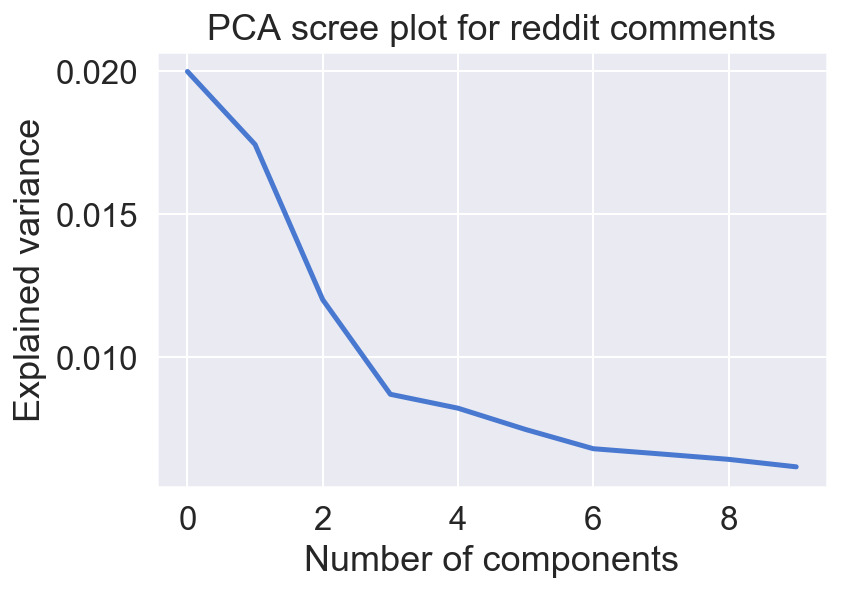

In [191]:
# plot graph to see elbow of how many components to include

plt.plot(pca_cv.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');
plt.title('PCA scree plot for reddit comments');
savefig('foo.png', bbox_inches='tight')

In [25]:
pd.DataFrame(pcafeatures_train_cv)

,0,1,2
0,0.946346,-0.372377,0.073981
1,-0.046404,-0.025639,-0.029448
2,-0.046404,-0.025639,-0.029448
3,-0.046404,-0.025639,-0.029448
4,-0.043312,-0.022180,-0.030318
5,-0.046404,-0.025639,-0.029448
6,-0.028727,-0.010062,-0.007293
7,-0.037422,-0.022330,-0.019132
8,-0.046404,-0.025639,-0.029448
9,0.071273,-0.044463,0.022992


In [ ]:
## WHAT SHOULD TARGET = ?

target_names = [0, 1, 2]

plot_PCA_2D(pcafeatures_train_cv, target=count_vecs, target_names=target_names)

### PCA on TF-IDF

In [26]:
pca_tfidf = PCA(n_components=3) 
pca_tfidf.fit(tfidf_vecs)
pcafeatures_train_tfidf = pca_tfidf.transform(tfidf_vecs)

In [27]:
pca_tfidf.explained_variance_ratio_

array([0.00708059, 0.00565703, 0.00551713])

In [28]:
display_topics(pca_tfidf, cv.get_feature_names(), 7)


Topic  0
black people, tell woman, want think, want use, want say, foster care, foster child

Topic  1
make sound, thing think, argument people, reason believe, change view, just tell, commit murder

Topic  2
kill fetus, thing think, make sound, baby birth, old baby, woman doctor, right people


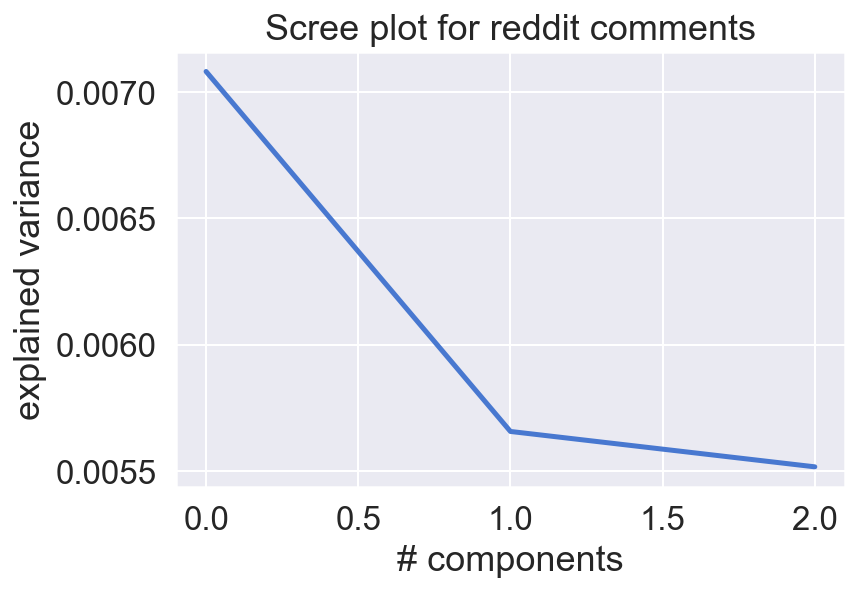

In [29]:
# plot graph to see elbow of how many components to include

plt.plot(pca_tfidf.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for reddit comments');

In [30]:
pd.DataFrame(pcafeatures_train_tfidf)

,0,1,2
0,0.217297,-0.002064,-0.008017
1,-0.007242,-0.004417,-0.006130
2,-0.007242,-0.004417,-0.006130
3,-0.007242,-0.004417,-0.006130
4,-0.007215,-0.005492,-0.006708
5,-0.007242,-0.004417,-0.006130
6,-0.005830,-0.003776,-0.007661
7,-0.006887,-0.002641,-0.006908
8,-0.007242,-0.004417,-0.006130
9,0.015248,-0.001659,0.008369


In [ ]:
## WHAT SHOULD MY TARGET BE SET TO? THIS IS LEE'S CODE, AND HER'S WAS LABELED

target_names = [0, 1, 2]

plot_PCA_2D(pcafeatures_train_tfidf, target=df.emotion, target_names=target_names)

## Non-Negative Matrix Factorization (NMF)

### NMF on TFIDF

In [31]:
nmf_model_tfidf = NMF(3)
doc_topic_nmf_tfidf = nmf_model_tfidf.fit_transform(X_wv)

The W matrix shows us the 2 resulting topics, and the terms that are associated with each topic. In this case:
- Component 1 (topic 1) seems to be about ?
- Component 2 (topic 2) seems to be about ?

In [32]:
display_topics(nmf_model_tfidf, word_vectorizer.get_feature_names(), 15)

# Note - if you need more than 25 words to figure out the pattern, your topic buckets may be too big
# might have independent subthemes living in the buckets; need smaller more tailored buckets


Topic  0
birth control, sex education, use birth, use birth control, unwanted pregnancy, planned parenthood, form birth, form birth control, control fail, birth control fail, control woman, plan parenthood, access birth control, access birth, people use

Topic  1
kill baby, human life, sound like, year old, plan parenthood, bodily autonomy, human right, kill child, v wade, roe v, right life, roe v wade, life begin, unborn child, just like

Topic  2
make sense, argument make, really make, feel like, just say, say make, right life, comment make, just want, look like, like say, think make, woman make, point make, s just


##### The H matrix shows us the documents we started with, and how each document is made up of the 2 resulting topics. In this case:
- The first document seems to be about music
- The last document seems to be about sports
- Everything in between is a combination of the two

In [33]:
ex_label = [c[:30]+"..." for c in corpus]

H_tfidf = pd.DataFrame(doc_topic_nmf_tfidf.round(5),
             index = ex_label,
             columns = ["component_1","component_2", "component_3"])
H_tfidf.head()

# things don't necessary add up to 1 or the same thing
# some are more generic discussions that don't necessarily have a strong tie in with music or sports
# could also generate a document with strong tie in to both

,component_1,component_2,component_3
child deserve love want right ...,0.06196,0.00717,0.00176
yes...,0.00000,0.00000,0.00000
definitely agree statement...,0.00000,0.00000,0.00000
exfoster kid exact childhood f...,0.00000,0.00000,0.00000
cheap compare state pay rais...,0.00028,0.00179,0.00002


### NMF on Count Vectorizer

In [34]:
# try 4 and 5 topics to see if you get a little more nuance

nmf_model_cv = NMF(3)
doc_topic_nmf_cv = nmf_model_cv.fit_transform(X_cv)

The W matrix shows us the 2 resulting topics, and the terms that are associated with each topic. In this case:
- Component 1 (topic 1) seems to be about ?
- Component 2 (topic 2) seems to be about ?

In [35]:
display_topics(nmf_model_cv, cv.get_feature_names(), 15)

# Note - if you need more than 25 words to figure out the pattern, your topic buckets may be too big
# might have independent subthemes living in the buckets; need smaller more tailored buckets


Topic  0
birth control, use birth, use birth control, unwanted pregnancy, sex education, form birth, control fail, form birth control, birth control fail, control woman, pregnancy birth, people sex, make sense, woman want, woman choose

Topic  1
human life, life begin, live human, begin conception, life begin conception, human organism, human life begin, potential human, life human, fetus human, human person, value human, new human, sperm egg, innocent human

Topic  2
bodily autonomy, right life, human right, pregnant woman, right bodily, right bodily autonomy, unborn child, kill baby, woman right, feel like, kill child, foster care, year old, force woman, right kill


The H matrix shows us the documents we started with, and how each document is made up of the 2 resulting topics. In this case:
- The first document seems to be about ?
- The last document seems to be about ?
- Everything in between is a combination of the two

In [106]:
H_cv = pd.DataFrame(doc_topic_nmf_cv.round(5),
             index = ex_label,
             columns = ["contraception","start_of_life", "bodily_autonomy"])
H_cv.head()

# things don't necessary add up to 1 or the same thing
# some are more generic discussions that don't necessarily have a strong tie in with music or sports
# could also generate a document with strong tie in to both

,contraception,start_of_life,bodily_autonomy
child deserve love want right ...,0.12971,0.00000,0.04299
yes...,0.00000,0.00000,0.00000
definitely agree statement...,0.00000,0.00000,0.00000
exfoster kid exact childhood f...,0.00000,0.00000,0.00000
cheap compare state pay rais...,0.00022,0.00077,0.00054


In [107]:
H_cv_fake = H_cv
H_cv_fake['other']  = H_cv_fake['contraception'] + H_cv_fake['start_of_life'] + H_cv_fake['bodily_autonomy']

In [108]:
H_cv_fake.head()

,contraception,start_of_life,bodily_autonomy,other
child deserve love want right ...,0.12971,0.00000,0.04299,0.17270
yes...,0.00000,0.00000,0.00000,0.00000
definitely agree statement...,0.00000,0.00000,0.00000,0.00000
exfoster kid exact childhood f...,0.00000,0.00000,0.00000,0.00000
cheap compare state pay rais...,0.00022,0.00077,0.00054,0.00153


In [109]:
H_cv_fake.loc[H_cv_fake['other'] != 0, "other"] =-1
H_cv_fake.loc[H_cv_fake['other'] == 0, "other"] =1

In [110]:
H_cv_fake.head()

,contraception,start_of_life,bodily_autonomy,other
child deserve love want right ...,0.12971,0.00000,0.04299,-1.0
yes...,0.00000,0.00000,0.00000,1.0
definitely agree statement...,0.00000,0.00000,0.00000,1.0
exfoster kid exact childhood f...,0.00000,0.00000,0.00000,1.0
cheap compare state pay rais...,0.00022,0.00077,0.00054,-1.0


In [111]:
H_cv_topics = H_cv_fake.idxmax(axis=1)

In [112]:
H_cv_topics.head()

child deserve love want right ...    contraception
yes...                                       other
definitely agree statement...                other
exfoster kid exact childhood f...            other
  cheap compare state pay rais...    start_of_life
dtype: object

In [113]:
H_cv['topics'] = H_cv_topics

In [114]:
H_cv.drop(['other'], axis=1, inplace=True)

In [115]:
H_cv.head()

,contraception,start_of_life,bodily_autonomy,topics
child deserve love want right ...,0.12971,0.00000,0.04299,contraception
yes...,0.00000,0.00000,0.00000,other
definitely agree statement...,0.00000,0.00000,0.00000,other
exfoster kid exact childhood f...,0.00000,0.00000,0.00000,other
cheap compare state pay rais...,0.00022,0.00077,0.00054,start_of_life


### Sentiment Analysis on NMF Count Vec

- if vader works do vader, if not do wordblob

In [ ]:
# plot a histogram for vader
# vader for each post within that topic
# plot histogram
# hope to find bimodal distribution by topic, as opposed to normal distribution; for some of the more controversial topics will prob find 2 peaks

In [ ]:
## QUESTION - should emojis be kept in text for this?

# https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

In [116]:
analyser = SentimentIntensityAnalyzer()

In [117]:
# use the polarity_scores() method to obtain the polarity indices for the given sentence

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return sentence, score

In [118]:
# feed each of my documents into this

sentiment_analyzer_scores("The phone is super cool.")

('The phone is super cool.',
 {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351})

In [119]:
H_cv.head()

,contraception,start_of_life,bodily_autonomy,topics
child deserve love want right ...,0.12971,0.00000,0.04299,contraception
yes...,0.00000,0.00000,0.00000,other
definitely agree statement...,0.00000,0.00000,0.00000,other
exfoster kid exact childhood f...,0.00000,0.00000,0.00000,other
cheap compare state pay rais...,0.00022,0.00077,0.00054,start_of_life


In [50]:
sentiment_analyzer_scores(corpus[0])

('child deserve love want right force woman gestate birth child want care forthe good way reduce demand make birth control free available antiabortion law make illegal common lead dead pregnant woman believe fantasy think',
 {'neg': 0.186, 'neu': 0.494, 'pos': 0.32, 'compound': 0.7003})

In [120]:
corpus_sentiment = [sentiment_analyzer_scores(c) for c in corpus]
corpus_sentiment[:10]

[('child deserve love want right force woman gestate birth child want care forthe good way reduce demand make birth control free available antiabortion law make illegal common lead dead pregnant woman believe fantasy think',
  {'neg': 0.186, 'neu': 0.494, 'pos': 0.32, 'compound': 0.7003}),
 ('yes', {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}),
 ('definitely agree statement',
  {'neg': 0.0, 'neu': 0.161, 'pos': 0.839, 'compound': 0.6369}),
 ('exfoster kid exact childhood feel deeply',
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}),
 ('  cheap compare state pay raise kid probably cost like   year',
  {'neg': 0.118, 'neu': 0.672, 'pos': 0.21, 'compound': 0.2732}),
 ('publicly fund stop',
  {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.296}),
 ('child bear save money eh love anyways',
  {'neg': 0.0, 'neu': 0.403, 'pos': 0.597, 'compound': 0.8126}),
 ('hello personally advocate sway issue like hear argument just liberal town just curious point civil downvote

In [121]:
corpus_sentiment_compound = [sentiment_analyzer_scores(c)[1]['compound'] for c in corpus]

In [122]:
corpus_sentiment_compound[:10]

[0.7003, 0.4019, 0.6369, 0.0, 0.2732, -0.296, 0.8126, 0.5859, 0.0, -0.743]

In [123]:
H_cv['compound'] = np.array(corpus_sentiment_compound)

In [124]:
H_cv.head()

,contraception,start_of_life,bodily_autonomy,topics,compound
child deserve love want right ...,0.12971,0.00000,0.04299,contraception,0.7003
yes...,0.00000,0.00000,0.00000,other,0.4019
definitely agree statement...,0.00000,0.00000,0.00000,other,0.6369
exfoster kid exact childhood f...,0.00000,0.00000,0.00000,other,0.0000
cheap compare state pay rais...,0.00022,0.00077,0.00054,start_of_life,0.2732


In [125]:
def sent_pos_neg(row):
    if row >=0.05:
        return "Positive"
    elif row < -0.05:
        return "Negative"
    else:
        return "Neutral"

In [126]:
H_cv['sentiment'] = H_cv.apply(lambda x: sent_pos_neg(x['compound']), axis=1)

In [127]:
H_cv.head()

,contraception,start_of_life,bodily_autonomy,topics,compound,sentiment
child deserve love want right ...,0.12971,0.00000,0.04299,contraception,0.7003,Positive
yes...,0.00000,0.00000,0.00000,other,0.4019,Positive
definitely agree statement...,0.00000,0.00000,0.00000,other,0.6369,Positive
exfoster kid exact childhood f...,0.00000,0.00000,0.00000,other,0.0000,Neutral
cheap compare state pay rais...,0.00022,0.00077,0.00054,start_of_life,0.2732,Positive


In [128]:
H_cv.reset_index(inplace=True)

In [129]:
H_cv.head()

,index,contraception,start_of_life,bodily_autonomy,topics,compound,sentiment
0,child deserve love want right ...,0.12971,0.00000,0.04299,contraception,0.7003,Positive
1,yes...,0.00000,0.00000,0.00000,other,0.4019,Positive
2,definitely agree statement...,0.00000,0.00000,0.00000,other,0.6369,Positive
3,exfoster kid exact childhood f...,0.00000,0.00000,0.00000,other,0.0000,Neutral
4,cheap compare state pay rais...,0.00022,0.00077,0.00054,start_of_life,0.2732,Positive


In [130]:
corpus[5]

'publicly fund stop'

In [131]:
H_cv.rename(columns = {'index':'clean_comment'}, inplace='True')
# H_cv.rename(columns = {'comment':'clean_comment'}, inplace='True')

In [132]:
H_cv.head()

,clean_comment,contraception,start_of_life,bodily_autonomy,topics,compound,sentiment
0,child deserve love want right ...,0.12971,0.00000,0.04299,contraception,0.7003,Positive
1,yes...,0.00000,0.00000,0.00000,other,0.4019,Positive
2,definitely agree statement...,0.00000,0.00000,0.00000,other,0.6369,Positive
3,exfoster kid exact childhood f...,0.00000,0.00000,0.00000,other,0.0000,Neutral
4,cheap compare state pay rais...,0.00022,0.00077,0.00054,start_of_life,0.2732,Positive


In [133]:
subs = pickle.load(open('reproductive_rights_subreddits.pkl', 'rb'))
coms = pickle.load(open('reproductive_rights_comments.pkl', 'rb'))

In [134]:
H_cv['subreddit'] = subs
H_cv['orig_comment'] = coms

In [135]:
H_cv.head()

,clean_comment,contraception,start_of_life,bodily_autonomy,topics,compound,sentiment,subreddit,orig_comment
0,child deserve love want right ...,0.12971,0.00000,0.04299,contraception,0.7003,Positive,prochoice,Every child deserves to be loved and wanted. N...
1,yes...,0.00000,0.00000,0.00000,other,0.4019,Positive,prochoice,YES.
2,definitely agree statement...,0.00000,0.00000,0.00000,other,0.6369,Positive,prochoice,I definitely agree with this statement.
3,exfoster kid exact childhood f...,0.00000,0.00000,0.00000,other,0.0000,Neutral,prochoice,As a pro-choice ex-foster kid who had this exa...
4,cheap compare state pay rais...,0.00022,0.00077,0.00054,start_of_life,0.2732,Positive,prochoice,Also 600 is cheap compared to the state paying...


In [66]:
H_cv[H_cv['topics'] == 'component_4'].index

Int64Index([    1,     2,     3,     5,     8,    10,    11,    12,    13,
               14,
            ...
            42875, 42877, 42878, 42879, 42881, 42882, 42883, 42884, 42885,
            42886],
           dtype='int64', length=18922)

In [165]:
# topics value counts

H_cv.topics.value_counts()

# Component 1 = contraception
# Component 2 = when does life begin?
# Component 3 = bodily autonomy & abortion
# Component 4 = no topic present

bodily_autonomy    19842
other              18922
start_of_life       2671
contraception       1453
Name: topics, dtype: int64

In [69]:
# sentiment value counts

H_cv.sentiment.value_counts()

Negative    17831
Positive    16827
Neutral      8230
Name: sentiment, dtype: int64

In [166]:
# group by topics, sentiments & count sentiment
# shows how sentiments are distributed across the different topics

H_cv.groupby(['topics','sentiment'])['sentiment'].count()

# Component 1 = contraception
# Component 2 = when does life begin?
# Component 3 = bodily autonomy & abortion
# Component 4 = no topic present

topics           sentiment
bodily_autonomy  Negative     10154
                 Neutral       1513
                 Positive      8175
contraception    Negative       726
                 Neutral        117
                 Positive       610
other            Negative      5765
                 Neutral       6258
                 Positive      6899
start_of_life    Negative      1186
                 Neutral        342
                 Positive      1143
Name: sentiment, dtype: int64

In [167]:
H_cv.head()

,clean_comment,contraception,start_of_life,bodily_autonomy,topics,compound,sentiment,subreddit,orig_comment
0,child deserve love want right ...,0.12971,0.00000,0.04299,contraception,0.7003,Positive,prochoice,Every child deserves to be loved and wanted. N...
1,yes...,0.00000,0.00000,0.00000,other,0.4019,Positive,prochoice,YES.
2,definitely agree statement...,0.00000,0.00000,0.00000,other,0.6369,Positive,prochoice,I definitely agree with this statement.
3,exfoster kid exact childhood f...,0.00000,0.00000,0.00000,other,0.0000,Neutral,prochoice,As a pro-choice ex-foster kid who had this exa...
4,cheap compare state pay rais...,0.00022,0.00077,0.00054,start_of_life,0.2732,Positive,prochoice,Also 600 is cheap compared to the state paying...


In [163]:
# pickling H_cv dataframe for dash app

pickle.dump(H_cv, open('H_cv_dataframe_dash.pkl', 'wb'))

In [168]:
df_temp = H_cv.groupby(['subreddit'])['clean_comment'].count()

In [169]:
df_temp

subreddit
prochoice    11767
prolife      31121
Name: clean_comment, dtype: int64

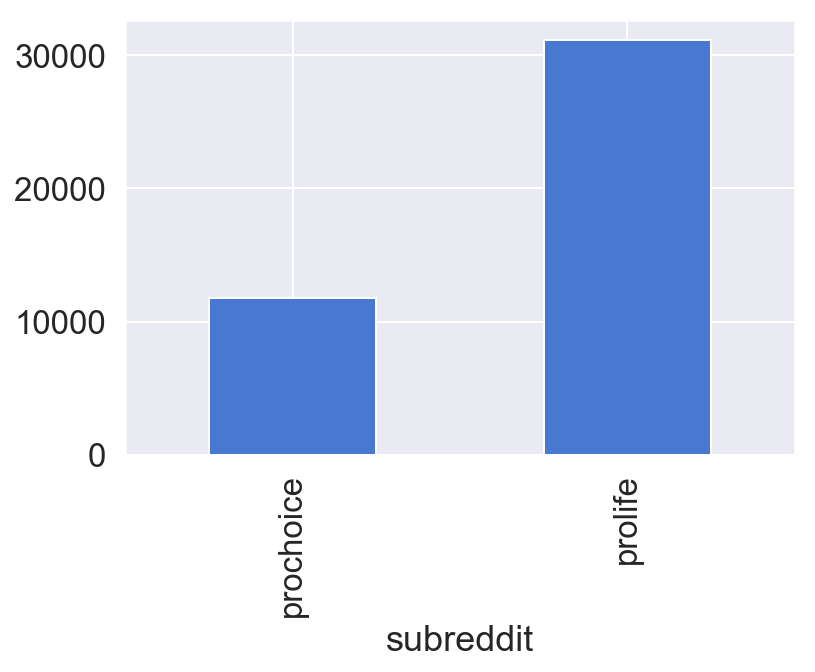

In [85]:
# H_cv.groupby(['subreddit'])['clean_comment'].count()
H_cv.groupby(['subreddit'])['clean_comment'].count().plot('bar')

In [ ]:
# H_cv.groupby(['subreddit'])['clean_comment'].hist()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

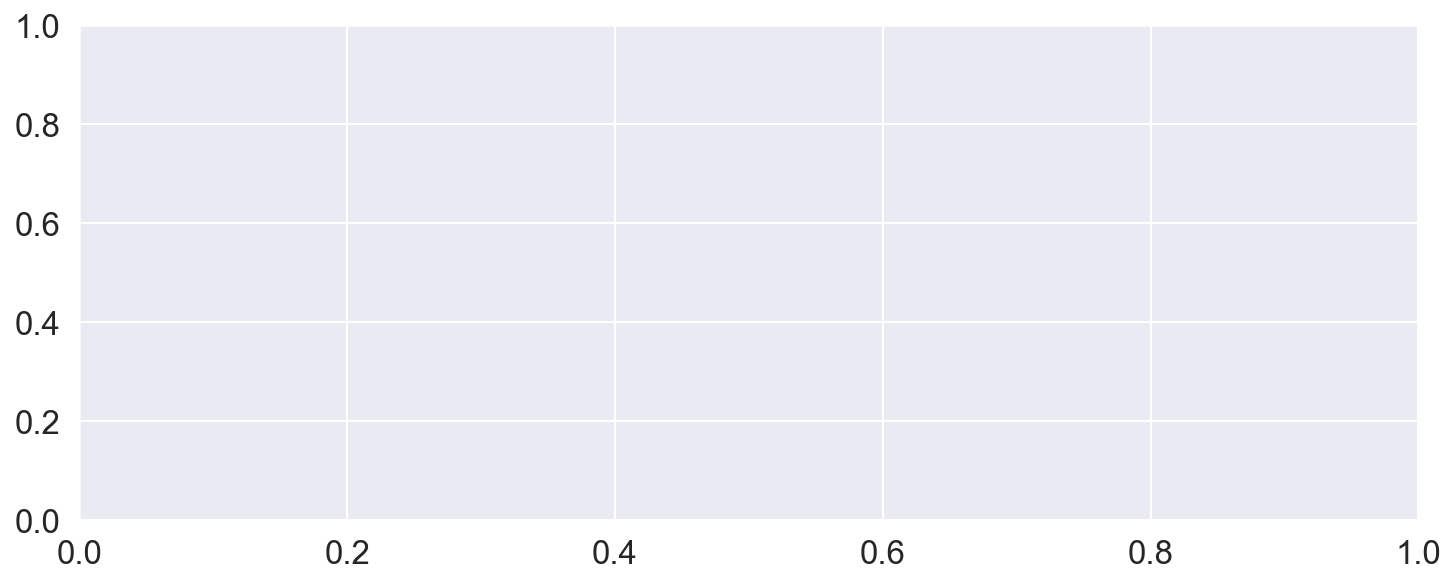

In [73]:
# Where is most of the conversation happening - in the prolife or prochoice subreddit forum?

fig, ax = plt.subplots(figsize=(12,10))

prochoice_coms = H_cv[H_cv['subreddit'] == 'prochoice']['clean_comment']
prolife_coms = H_cv[H_cv['subreddit'] == 'prolife']['clean_comment']

plt.subplot(2,1,1)
ax1 = sns.distplot(prochoice_coms, bins=20, kde=False)
# ax1.set_xlabel("Comments",fontsize=12)
ax1.set_ylabel("Comment Frequency",fontsize=12)
plt.ylim(0,90)
plt.title("Pro Choice")

plt.subplot(2,1,2)
ax2 = sns.distplot(prolife_coms, bins=20, kde=False)
# ax2.set_xlabel("Comment",fontsize=12)
ax2.set_ylabel("Comment Frequency",fontsize=12)
plt.ylim(0,90)
plt.title("Pro Life")

plt.tight_layout()

In [170]:
H_cv['topics']

0          contraception
1                  other
2                  other
3                  other
4          start_of_life
5                  other
6        bodily_autonomy
7        bodily_autonomy
8                  other
9        bodily_autonomy
10                 other
11                 other
12                 other
13                 other
14                 other
15       bodily_autonomy
16       bodily_autonomy
17       bodily_autonomy
18                 other
19         start_of_life
20                 other
21       bodily_autonomy
22       bodily_autonomy
23         contraception
24       bodily_autonomy
25       bodily_autonomy
26       bodily_autonomy
27         contraception
28       bodily_autonomy
29       bodily_autonomy
              ...       
42858              other
42859    bodily_autonomy
42860              other
42861              other
42862              other
42863              other
42864    bodily_autonomy
42865    bodily_autonomy
42866    bodily_autonomy


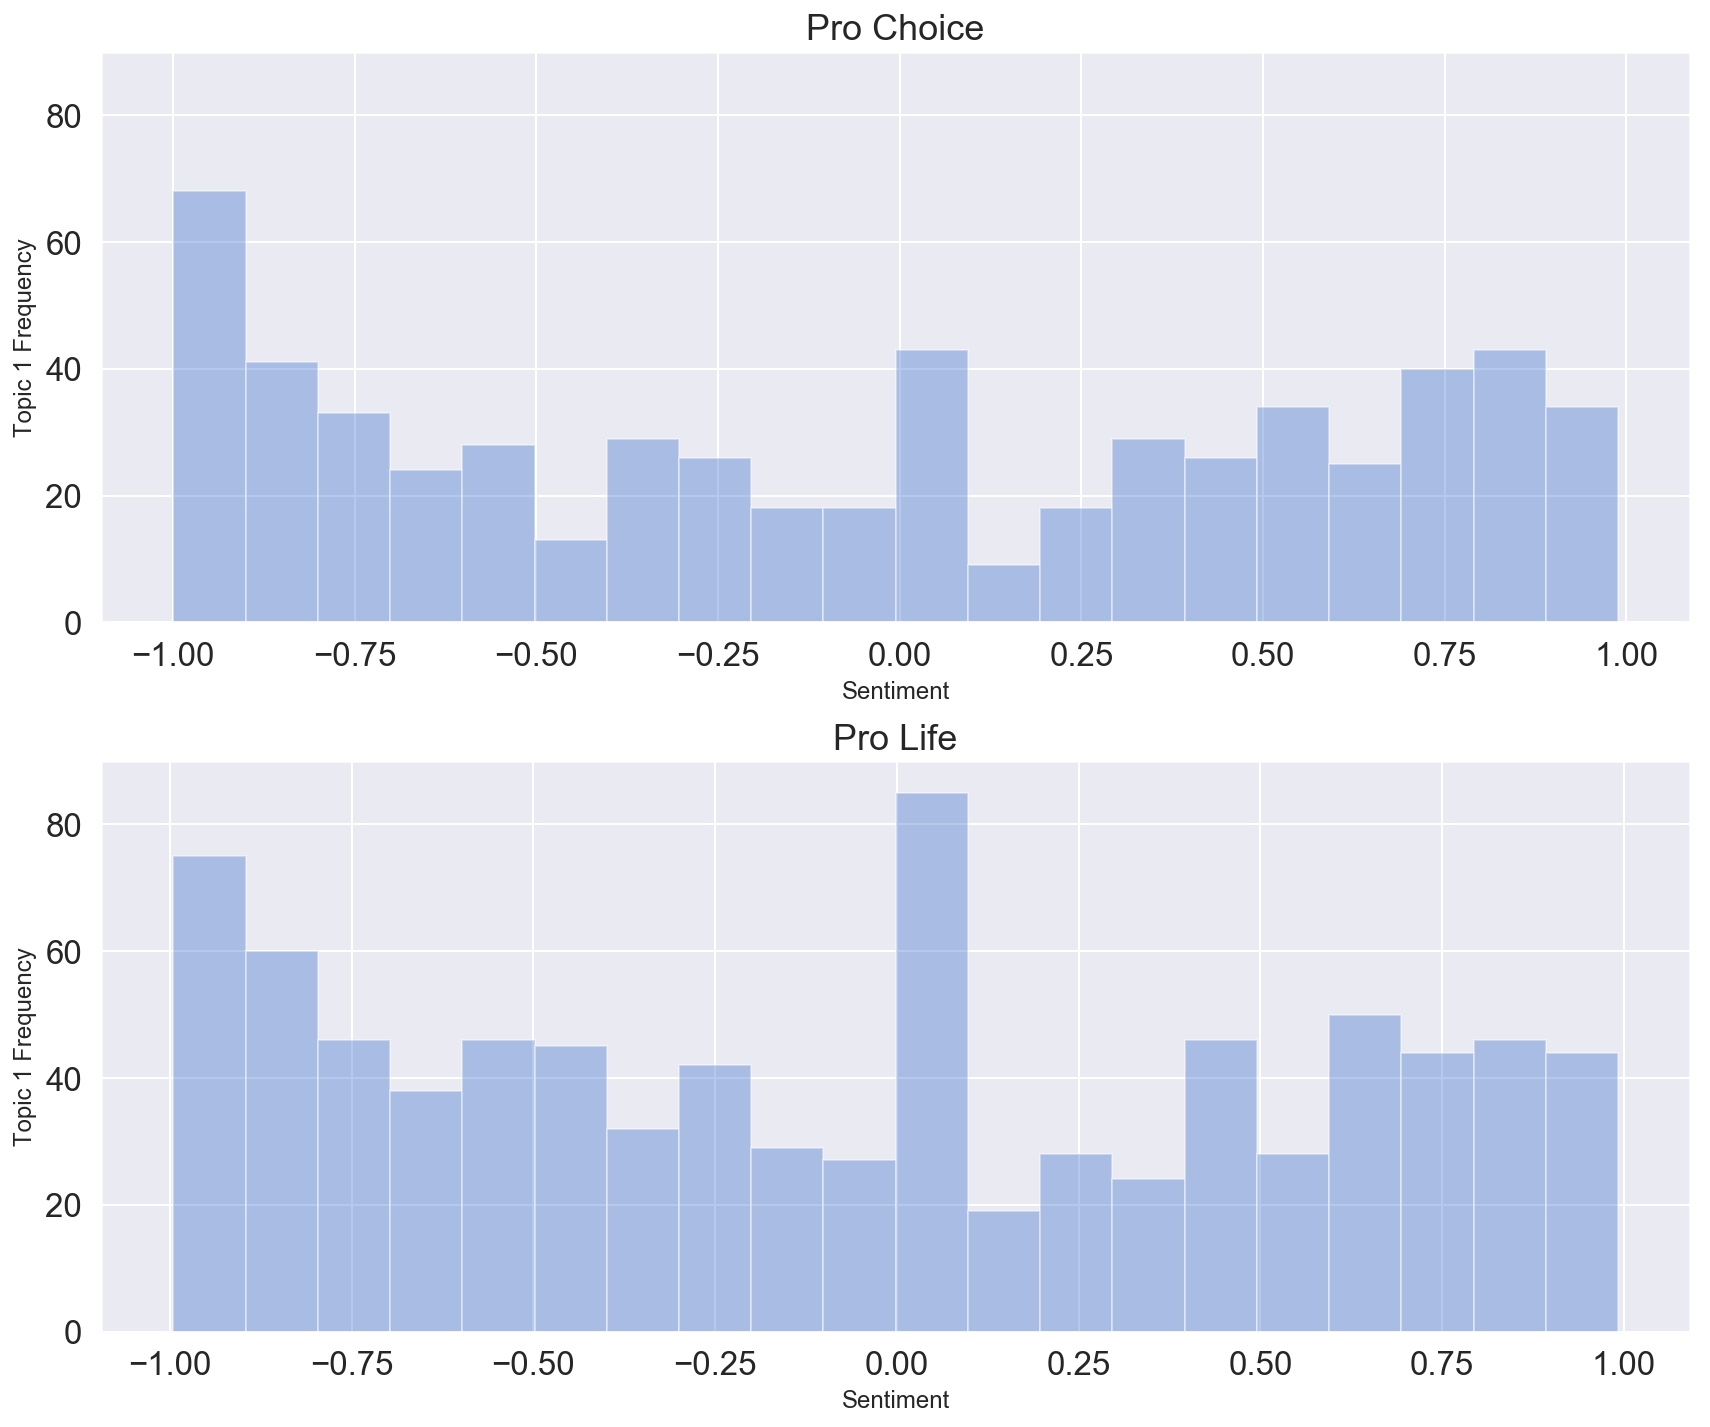

In [171]:
# Component 1 prochoice vs. prolife sentiment subplots

fig, ax = plt.subplots(figsize=(12,10))

comp_1_compound_pc = H_cv[(H_cv['topics'] == 'contraception') & (H_cv['subreddit'] == 'prochoice')]['compound']
comp_1_compound_pl = H_cv[(H_cv['topics'] == 'contraception') & (H_cv['subreddit'] == 'prolife')]['compound']

plt.subplot(2,1,1)
ax1 = sns.distplot(comp_1_compound_pc, bins=20, kde=False)
ax1.set_xlabel("Sentiment",fontsize=12)
ax1.set_ylabel("Topic 1 Frequency",fontsize=12)
plt.ylim(0,90)
plt.title("Pro Choice")

plt.subplot(2,1,2)
ax2 = sns.distplot(comp_1_compound_pl, bins=20, kde=False)
ax2.set_xlabel("Sentiment",fontsize=12)
ax2.set_ylabel("Topic 1 Frequency",fontsize=12)
plt.ylim(0,90)
plt.title("Pro Life")

plt.tight_layout()

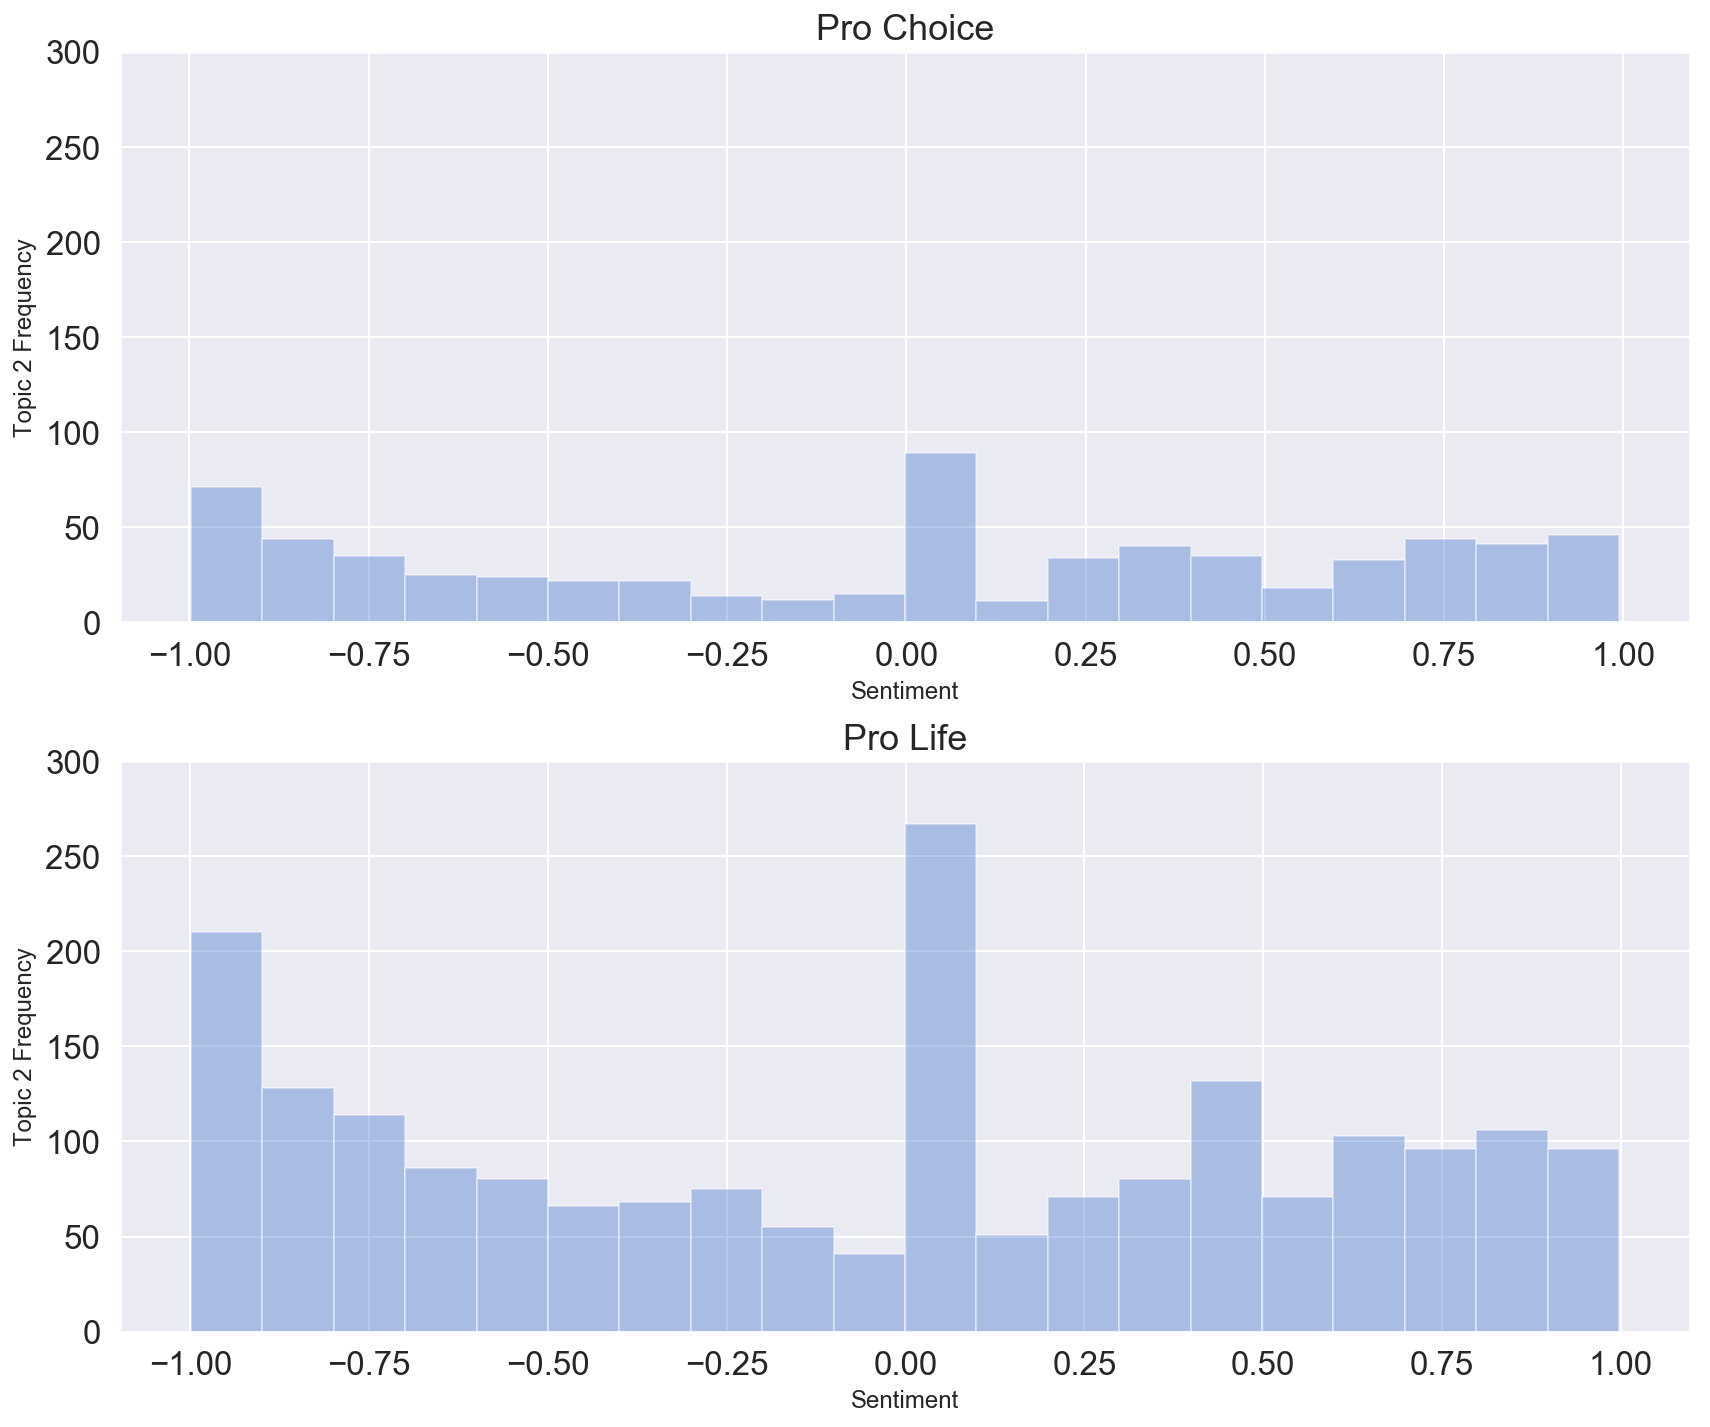

In [172]:
# Component 2 prochoice vs. prolife sentiment subplots

fig, ax = plt.subplots(figsize=(12,10))

comp_2_compound_pc = H_cv[(H_cv['topics'] == 'start_of_life') & (H_cv['subreddit'] == 'prochoice')]['compound']
comp_2_compound_pl = H_cv[(H_cv['topics'] == 'start_of_life') & (H_cv['subreddit'] == 'prolife')]['compound']

plt.subplot(2,1,1)
ax1 = sns.distplot(comp_2_compound_pc, bins=20, kde=False)
ax1.set_xlabel("Sentiment",fontsize=12)
ax1.set_ylabel("Topic 2 Frequency",fontsize=12)
plt.ylim(0,300)
plt.title("Pro Choice")

plt.subplot(2,1,2)
ax2 = sns.distplot(comp_2_compound_pl, bins=20, kde=False)
ax2.set_xlabel("Sentiment",fontsize=12)
ax2.set_ylabel("Topic 2 Frequency",fontsize=12)
plt.ylim(0,300)
plt.title("Pro Life")

plt.tight_layout()

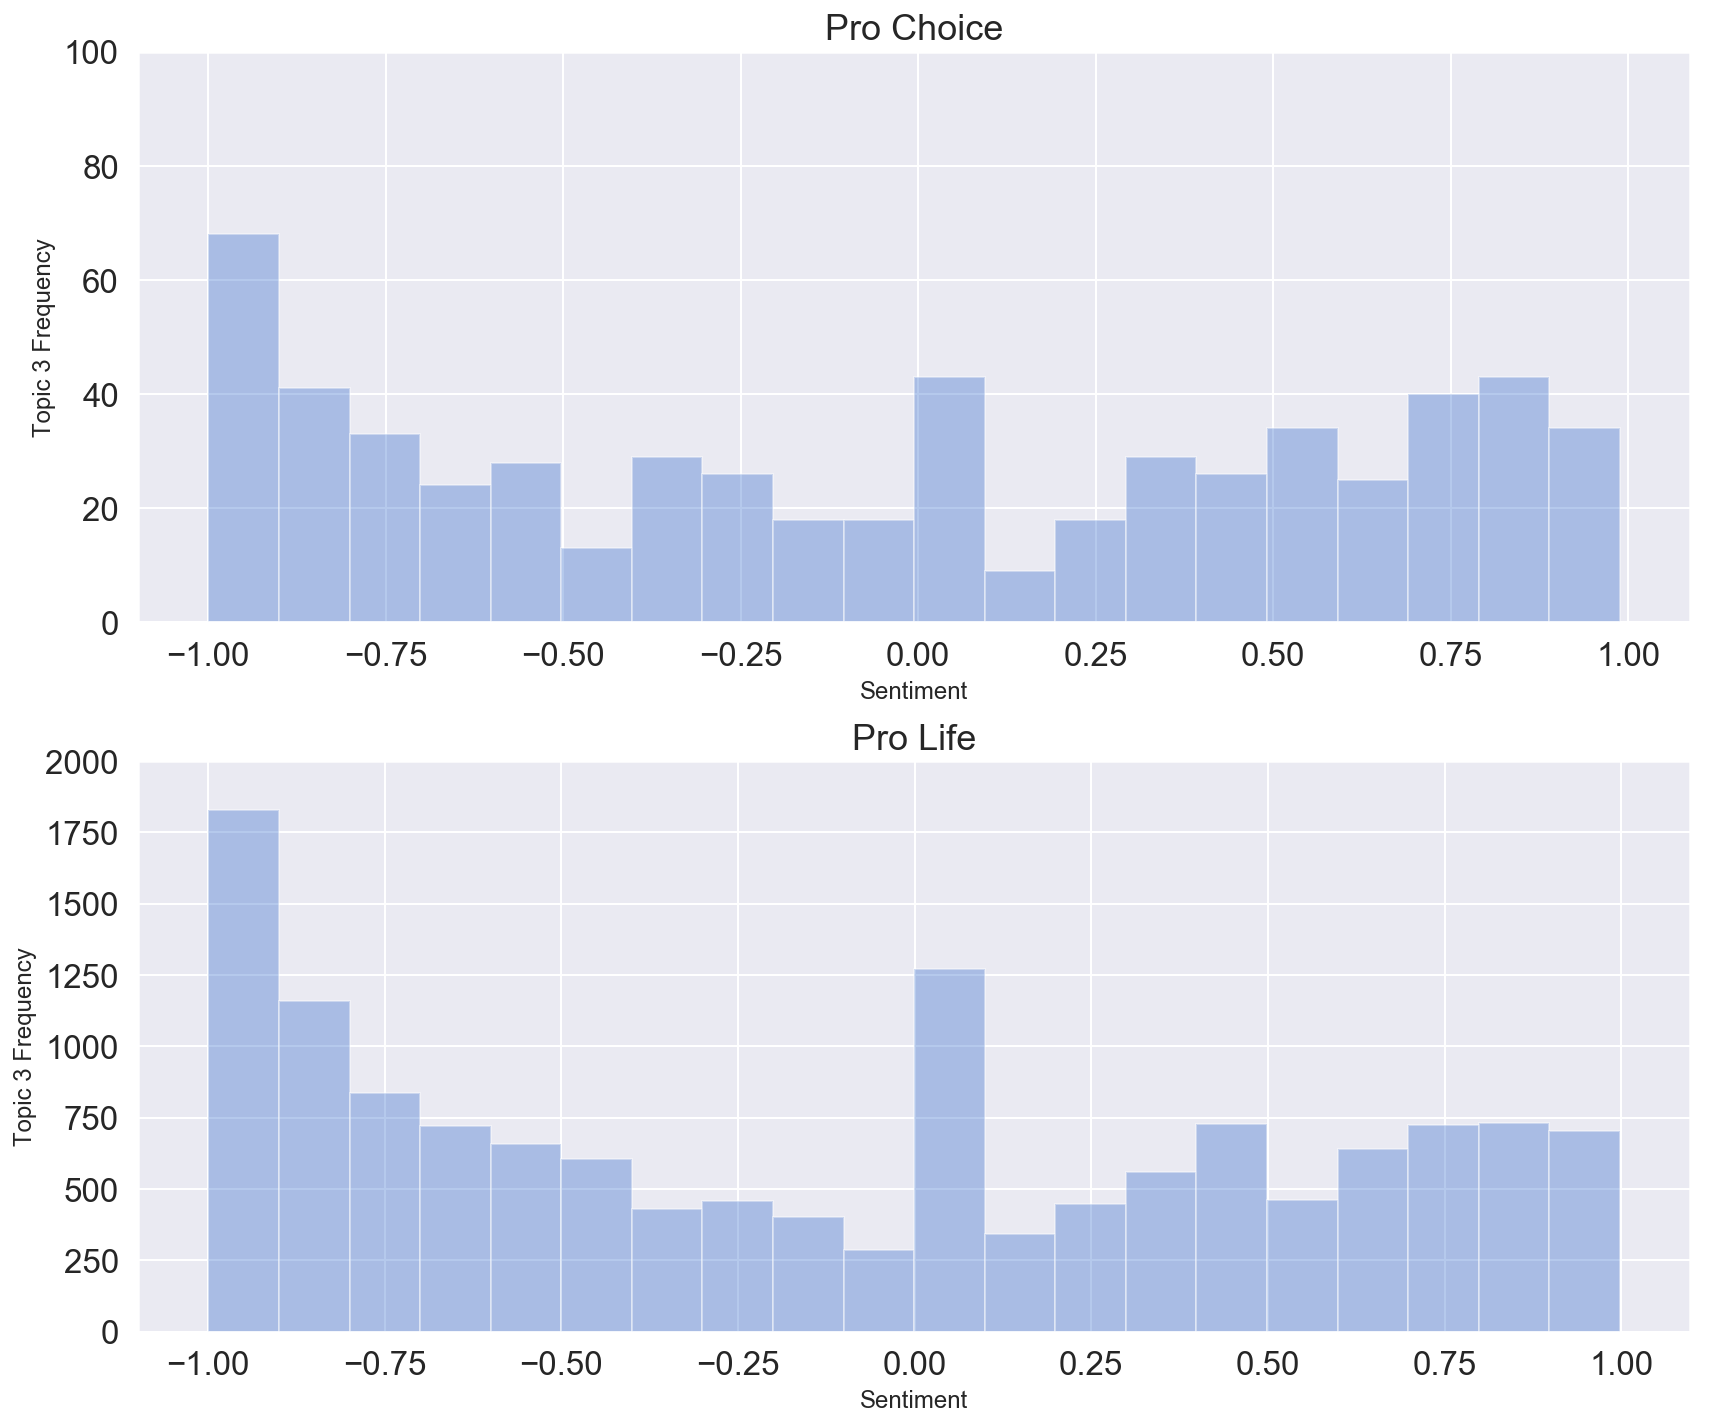

In [173]:
# Component 3 prochoice vs. prolife sentiment subplots

fig, ax = plt.subplots(figsize=(12,10))

comp_3_compound_pc = H_cv[(H_cv['topics'] == 'bodily_autonomy') & (H_cv['subreddit'] == 'prochoice')]['compound']
comp_3_compound_pl = H_cv[(H_cv['topics'] == 'bodily_autonomy') & (H_cv['subreddit'] == 'prolife')]['compound']

plt.subplot(2,1,1)
ax1 = sns.distplot(comp_1_compound_pc, bins=20, kde=False)
ax1.set_xlabel("Sentiment",fontsize=12)
ax1.set_ylabel("Topic 3 Frequency",fontsize=12)
plt.ylim(0,100)
plt.title("Pro Choice")

plt.subplot(2,1,2)
ax2 = sns.distplot(comp_3_compound_pl, bins=20, kde=False)
ax2.set_xlabel("Sentiment",fontsize=12)
ax2.set_ylabel("Topic 3 Frequency",fontsize=12)
plt.ylim(0,2000)
plt.title("Pro Life")

plt.tight_layout()

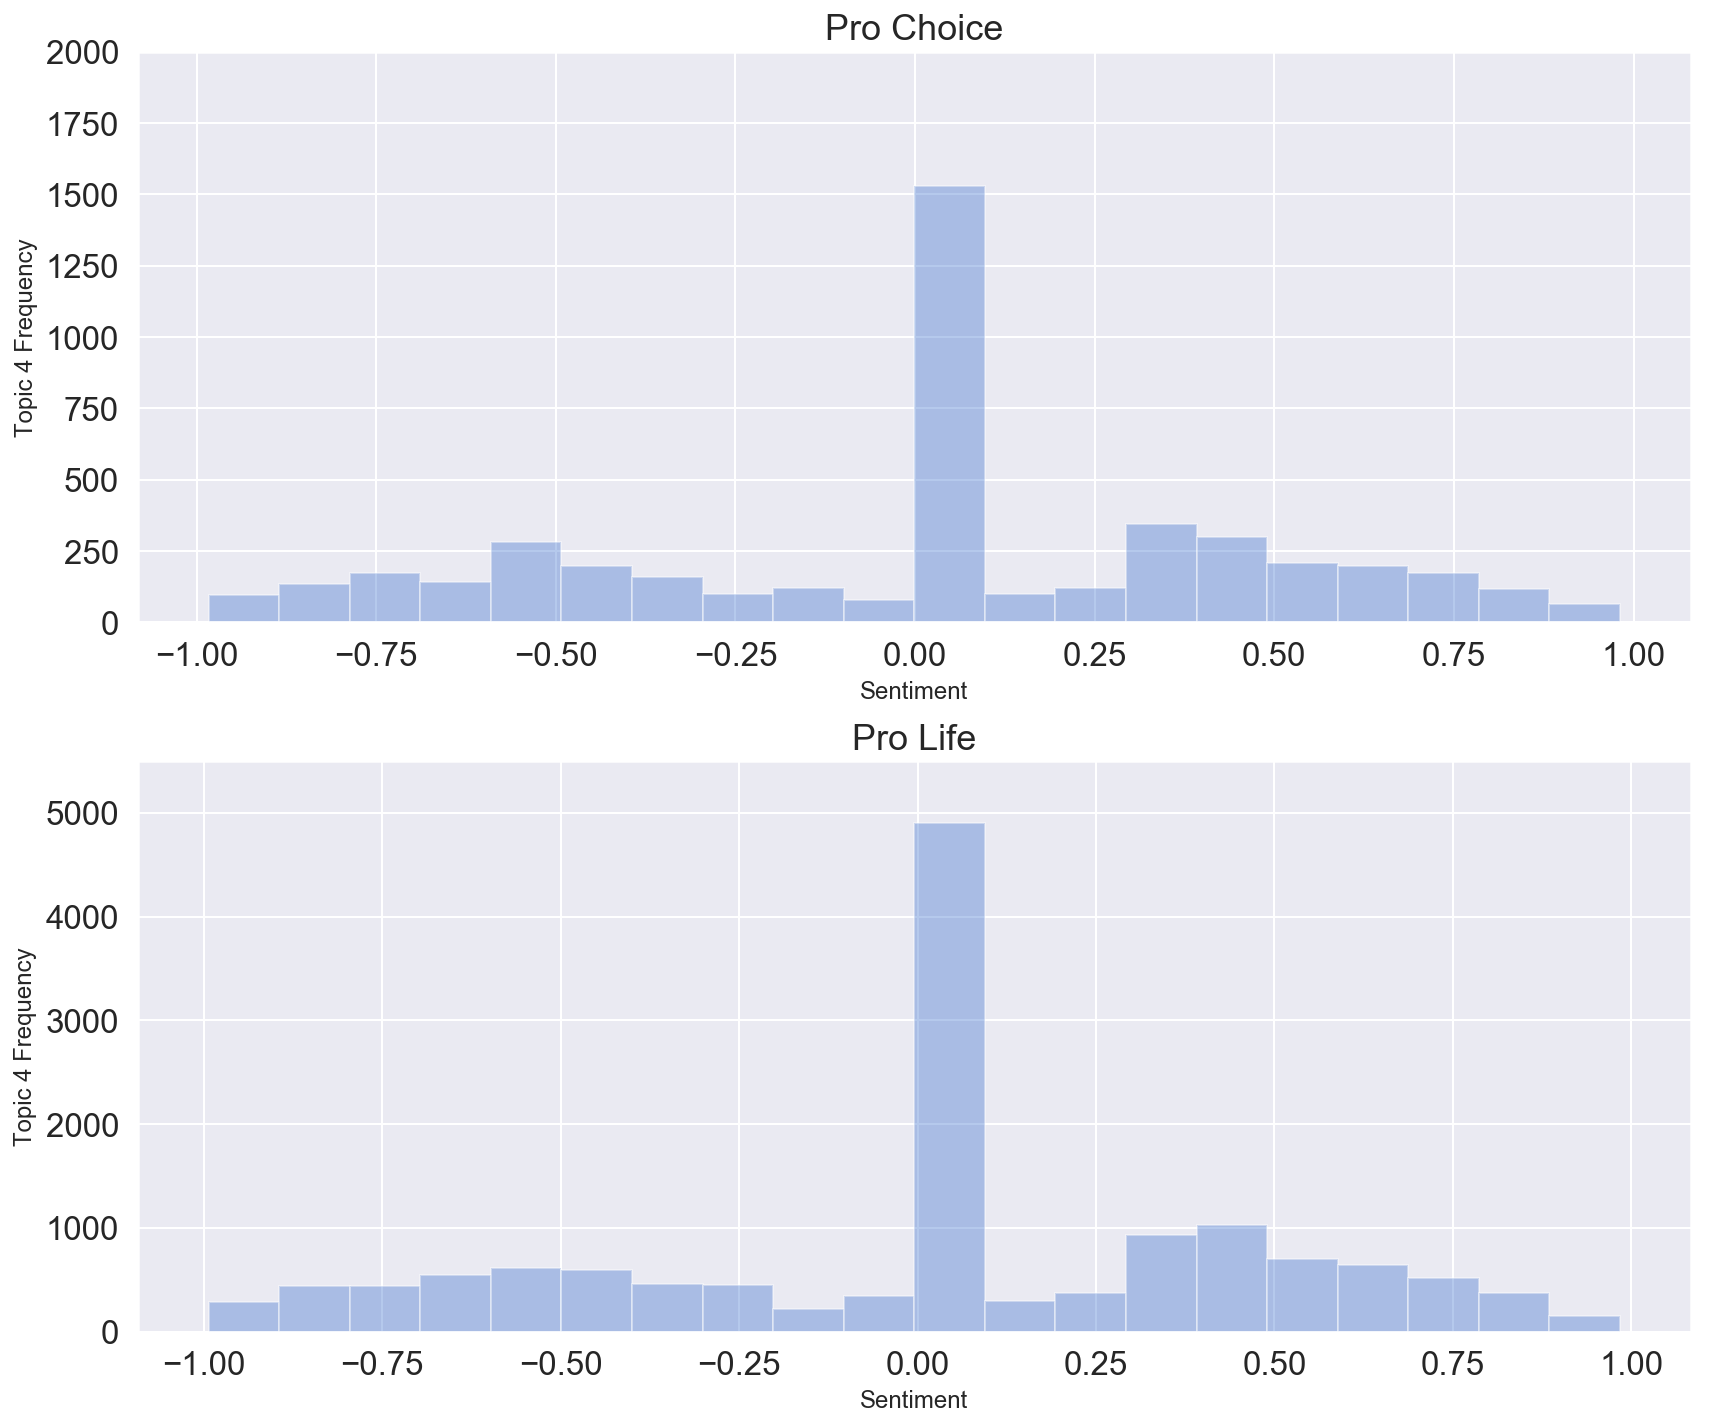

In [174]:
# Component 4 prochoice vs. prolife sentiment subplots

fig, ax = plt.subplots(figsize=(12,10))

comp_4_compound_pc = H_cv[(H_cv['topics'] == 'other') & (H_cv['subreddit'] == 'prochoice')]['compound']
comp_4_compound_pl = H_cv[(H_cv['topics'] == 'other') & (H_cv['subreddit'] == 'prolife')]['compound']

plt.subplot(2,1,1)
ax1 = sns.distplot(comp_4_compound_pc, bins=20, kde=False)
ax1.set_xlabel("Sentiment",fontsize=12)
ax1.set_ylabel("Topic 4 Frequency",fontsize=12)
plt.ylim(0,2000)
plt.title("Pro Choice")

plt.subplot(2,1,2)
ax2 = sns.distplot(comp_4_compound_pl, bins=20, kde=False)
ax2.set_xlabel("Sentiment",fontsize=12)
ax2.set_ylabel("Topic 4 Frequency",fontsize=12)
plt.ylim(0,5500)
plt.title("Pro Life")

plt.tight_layout()

###### The above plots elucidate that there are 9 clusters + noise in my data

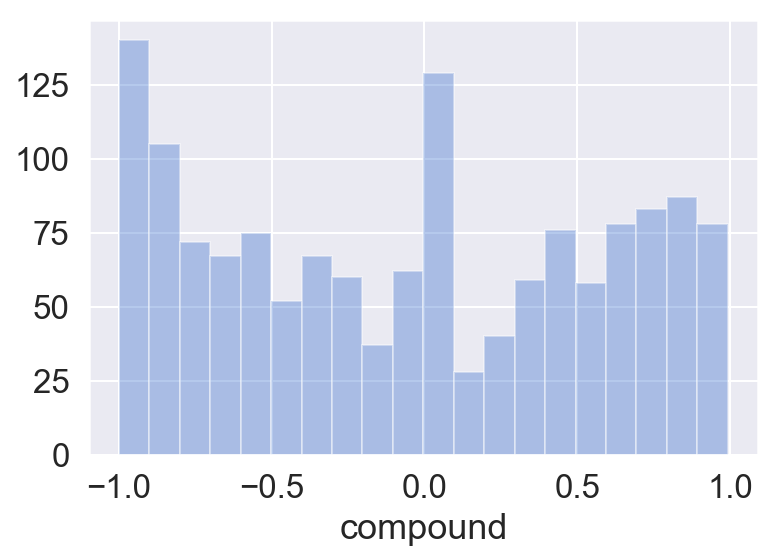

In [78]:
## histogram by compound
# Component 1 compound sentiment scores

comp_1_compound = H_cv[H_cv['topics'] == 'component_1']['compound']

sns.distplot(comp_1_compound, bins=20, kde=False)

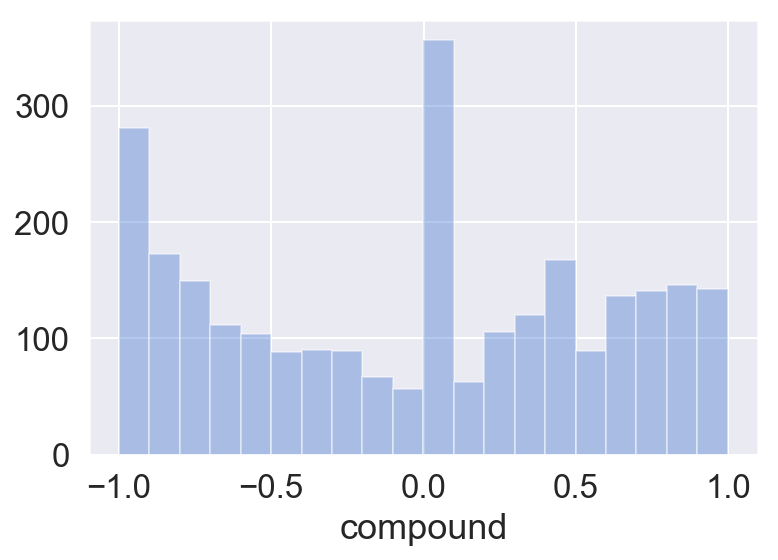

In [79]:
## histogram by compound
# Component 2 compound sentiment scores

comp_2_compound = H_cv[H_cv['topics'] == 'component_2']['compound']

sns.distplot(comp_2_compound, bins=20, kde=False)

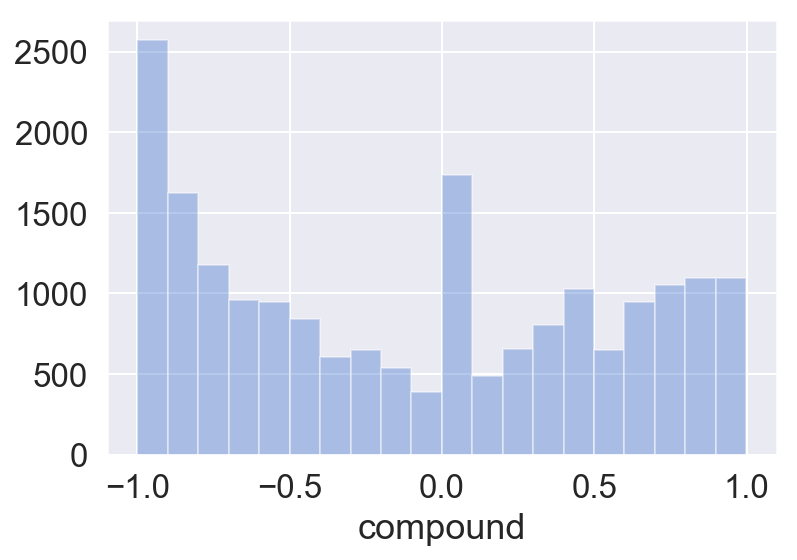

In [80]:
## histogram by compound
# Component 3 compound sentiment scores

comp_3_compound = H_cv[H_cv['topics'] == 'component_3']['compound']

sns.distplot(comp_3_compound, bins=20, kde=False)

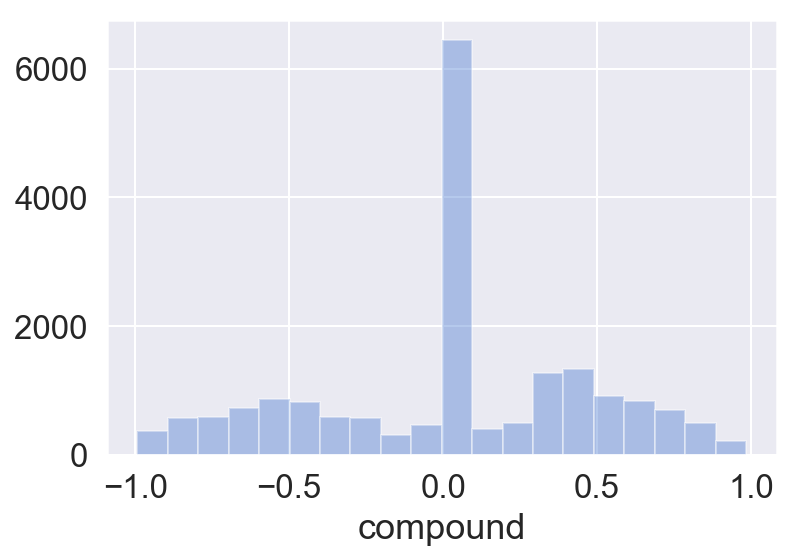

In [81]:
## histogram by compound
# Component 4 (NOISE) compound sentiment scores

comp_4_compound = H_cv[H_cv['topics'] == 'component_4']['compound']

sns.distplot(comp_4_compound, bins=20, kde=False)

# Dash App

In [94]:
# imports

import dash
import dash_core_components as dcc
import dash_html_components as html

/Users/laurenfinkelstein/anaconda3/lib/python3.7/site-packages/werkzeug/datastructures.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Container, Iterable, MutableSet
/Users/laurenfinkelstein/anaconda3/lib/python3.7/site-packages/werkzeug/datastructures.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Container, Iterable, MutableSet


In [ ]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'},
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'title': 'Dash Data Visualization'
            }
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

# Ideas to do next

In [ ]:
# plots...

In [ ]:
# feed dataframe with document, components, topic, sentiment into classifier to make a predictive model?

In [ ]:
# Next, could do Embedding - e.g., Word2Vec or Stanford Glove

# Old code attempted

##### Reducing to 2D with t-SNE 

In [ ]:
## THIS WAS TAKING TOO LONG -- do word2vec and THEN do this so its reduced and runs faster

In [ ]:
# a t-SNE model
# angle value close to 1 means sacrificing accuracy for speed
# pca initializtion usually leads to better results 
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')

# 20-D -> 2-D
tsne_lda = tsne_model.fit_transform(X_cv.toarray())

In [ ]:
# convert my topic column into numbers
# look for SK Learn function called label encoding - this will convert every class into some number
# then can get the mapping from the number to the class by accessing the label encoding object
# LE = labelencoding
# then after train LE, has additional attribute called LE.classes
# this will give you the mapping

# T-SNE to visualize clusters

In [ ]:
# Utility function to visualize the outputs of PCA and t-SNE

def scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
# NMF T-SNE
tsne = TSNE(random_state=RS).fit_transform(X_cv) # change x_subset

In [ ]:
scatter(tsne, H_cv_topics) # change y_subset to my topics?

In [ ]:
# PCA T-SNE
tsne = TSNE(random_state=RS).fit_transform(pcafeatures_train)

In [ ]:
scatter(tsne, df.emotion)

In [ ]:
# 3D t-SNE plot code

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =pd.DataFrame(tsne_3d).loc[:,0]
y2 =pd.DataFrame(tsne_3d).loc[:,1]
z =pd.DataFrame(tsne_3d).loc[:,2]



ax.scatter(x, y2, z, c=df.emotion, marker='o', )

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
# tsne with 3 components

tsne = TSNE(random_state=RS, n_components=3).fit_transform(nmf_topics)

# Word 2 Vec

In [ ]:
# convo with Han Wei -- matrix will be # rows I have (1.3k) * 300
    # when Google trained this model, they set the dimension as 300
# Can also try Glove (similar to Word2Vec); Stanford trained this model
    # they set the components to 100

# Word Clouds